In [1]:
# Load fibromyalgia data

import pickle

with open('../../LatentSimilarity/data/fibromyalgia-data.pkl', 'rb') as f:
    data = pickle.load(f)

print(list(data.keys()))

['subs', 'fibromyalgia', 'fibromyalgia_score', 'rest', 'epr']


In [2]:
# Create matrix of vectorized FC data and list demographic data numpy arrays

import numpy as np

subs = list(data['subs'])
subs.sort()

# Fibromyalgia, Fibromyalgia_Score, RestOrEpr
demo_types = ['categorical', 'continuous', 'categorical']

demo = [[], [], []]
fc = []

for sub in subs:
    notin = False
    for key in data.keys():
        if sub not in data[key]:
            notin = True
    if notin:
        print(sub)
        continue
    demo[0].append(int(data['fibromyalgia'][sub]))
    demo[0].append(demo[0][-1])
    demo[1].append(int(data['fibromyalgia_score'][sub]))
    demo[1].append(demo[0][-1])
    demo[2].append(0)
    demo[2].append(1)
    fc.append(data['rest'][sub])
    fc.append(data['epr'][sub])

fc = np.stack(fc)
for i in range(len(demo)):
    demo[i] = np.array(demo[i])
    print(demo[i])

print(fc.shape)

5
[1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[494   1 709   1 786   1   0   0 775   1 645   1 562   1 276   1   0   0
 496   1   0   0 503   1   0   0 720   1   0   0 489   1 690   1   0   0
   0   0 341   1 564   1 589   1   0   0 586   1 533   1   0   0   0   0
   0   0   0   0   0   0   0   0 625   1 659   1  81   1 467   1   0   0
 541   1 566   1   0   0 335   1   0   0 674   1 276   1 572   1 441   1
 206   1 449   1   0   0   0   0   0   0   0   0   0   0 647   1 621   1
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0

In [8]:
# Load pip DemoVAE model

import sys

p = '../pip/src'

if p not in sys.path:
    sys.path.append(p)
    print(sys.path)

from demovae import DemoVAE

vae = DemoVAE(pperiod=10, use_cuda=False, nepochs=3000, latent_dim=30, weight_decay=0, lr=5e-5, loss_rec_mult=500, loss_pred_mult=.01)
vae.fit(fc, demo, demo_types)

Fitting auxilliary guidance model for demographic 0 categorical... done
Fitting auxilliary guidance model for demographic 1 continuous... done
Fitting auxilliary guidance model for demographic 2 categorical... done
Converting input to pytorch
Converting demographics to pytorch
Beginning VAE training
Epoch 0 ReconLoss 10.748 CovarianceLoss 23.6487 MeanLoss 0.0496 DecorLoss 12.1195 GuidanceTargets [0, 1, -59.07774353027344, 1, 0] GuidanceLosses ['65.7994', '65.7994', '474.3039', '17.2348', '17.2348'] 
Epoch 10 ReconLoss 6.8144 CovarianceLoss 27.8471 MeanLoss 0.3664 DecorLoss 3.3909 GuidanceTargets [0, 1, -184.92660522460938, 0, 1] GuidanceLosses ['0.1062', '0.1062', '643.1355', '6.7288', '6.7288'] 
Epoch 20 ReconLoss 3.9272 CovarianceLoss 24.4632 MeanLoss 0.2876 DecorLoss 3.4262 GuidanceTargets [1, 0, 92.25234985351562, 0, 1] GuidanceLosses ['28.631', '28.631', '393.8621', '30.6151', '30.6151'] 
Epoch 30 ReconLoss 1.9957 CovarianceLoss 23.6573 MeanLoss 0.2564 DecorLoss 1.9992 GuidanceTar

DemoVAE(LR_C=100, alpha=100, bsize=1000, latent_dim=30, loss_C_mult=1,
        loss_decor_mult=1, loss_mu_mult=1, loss_pred_mult=0.01,
        loss_rec_mult=500, lr=5e-05, nepochs=3000, pperiod=10, use_cuda=False,
        weight_decay=0)

In [6]:
# Check latents

z = vae.get_latents(fc)
print(z)

[[-0.49672827  0.3203328   0.10338741 ...  0.01060998 -0.1559384
   0.09760398]
 [-0.667361    0.58038044  0.07018337 ...  0.26949155  0.04966974
   0.15887007]
 [-1.1015874   0.7849748   0.19294775 ...  0.07570748 -0.09482844
   0.20040487]
 ...
 [-0.7285744   0.6704366   0.09920011 ...  0.33574152  0.01119418
   0.2060624 ]
 [-1.3406825   1.158475    0.10834973 ...  0.20276608 -0.08329682
   0.34296802]
 [-0.9822855   0.87743217  0.12769479 ...  0.3170856  -0.03988738
   0.25872472]]


In [7]:
# Test get_latents, save, and load

path = '/home/anton/Documents/Tulane/Research/DemoVAE/model.pkl'

vae.save(path)
vae.load(path)

z = vae.get_latents(fc)
print(z)

[[-0.49672827  0.3203328   0.10338741 ...  0.01060998 -0.1559384
   0.09760398]
 [-0.667361    0.58038044  0.07018337 ...  0.26949155  0.04966974
   0.15887007]
 [-1.1015874   0.7849748   0.19294775 ...  0.07570748 -0.09482844
   0.20040487]
 ...
 [-0.7285744   0.6704366   0.09920011 ...  0.33574152  0.01119418
   0.2060624 ]
 [-1.3406825   1.158475    0.10834973 ...  0.20276608 -0.08329682
   0.34296802]
 [-0.9822855   0.87743217  0.12769479 ...  0.3170856  -0.03988738
   0.25872472]]


In [15]:
import matplotlib.pyplot as plt

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

xx = vae.transform(fc, demo, demo_types)

print('Done')

Done


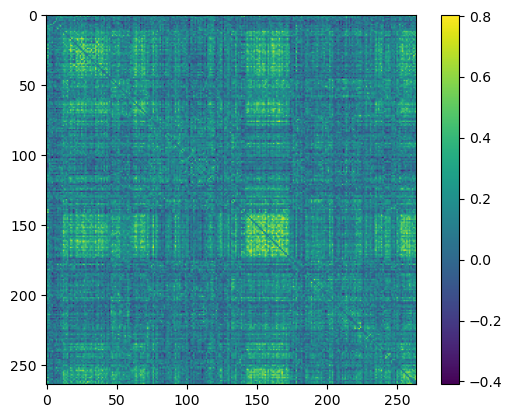

In [16]:
plt.imshow(vec2mat(xx[109]))
plt.colorbar()

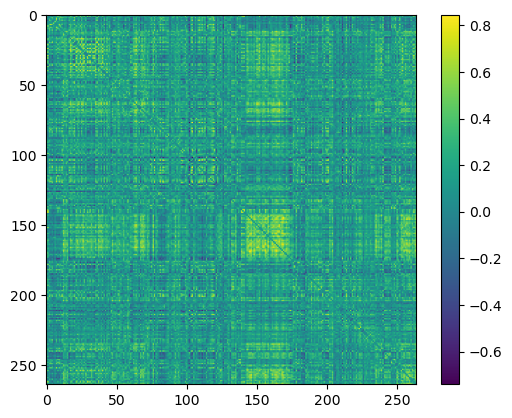

In [17]:
plt.imshow(vec2mat(fc[109]))
plt.colorbar()